In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.random.seed(1234)

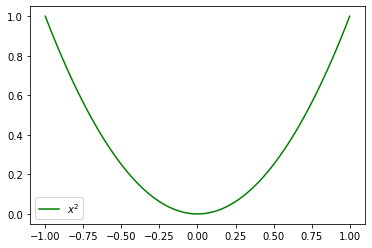

In [3]:
def f(x):
    return x**2
def df(x):
  return 2*x
x_test = np.linspace(-1, 1, 100)
y_test = f(x_test)
plt.plot(x_test, y_test, c="g", label="$x^2$")
plt.legend()
plt.show()

x that produces the smallest value  3.741444191567113e-06
Number of iterations  57


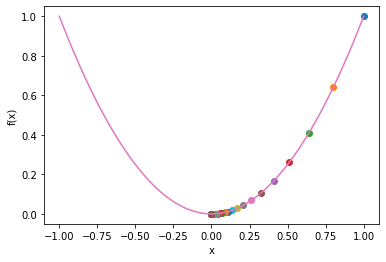

In [4]:
error = 1.0
tolerance = 1e-5
alpha = 0.1
x = 1

iteration = 1
max_iteration = 1000

while error > tolerance and iteration < max_iteration:
    plt.plot(x, f(x), 'o')
    grad = df(x)
    x -= alpha * grad
    error = abs(grad)
    iteration += 1

print ("x that produces the smallest value ", x)
print ("Number of iterations ", iteration)

plt.plot(x_test, f(x_test), '-')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

x that produces the smallest value  3.741444191567113e-06
Number of iterations  57


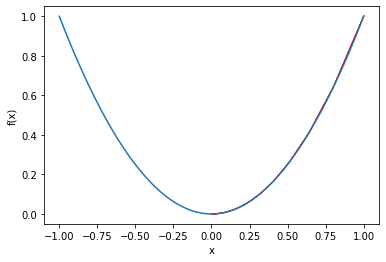

In [5]:
error = 1.0
tolerance = 1e-5
alpha = 0.1
x = 1

iteration = 1
max_iteration = 1000

while error > tolerance and iteration < max_iteration:
    grad = df(x)
    x_old = x
    x -= alpha * grad
    plt.arrow(x, f(x),x_old-x,f(x_old)-f(x),color = "r")
    error = abs(grad)
    iteration += 1

print ("x that produces the smallest value ", x)
print ("Number of iterations ", iteration)

plt.plot(x_test, f(x_test), '-')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

Dùng thuật toán gradient descent tối ưu hàm f(x) = x^2, với giá trị khởi tạo x = 2 và thử các learning rate khác nhau (0.2, 1, 2), vẽ đồ thị hàm loss để hiện sự thay đổi hàm f(x) sau các bước update.

In [12]:
def sqr(x):
  return x * x

def plot_GD(func = sqr, start = 2, lr = [0.01, 1], iter = 10):
  plt.xlabel("Iteration")
  plt.ylabel("Value")
  plt.title("Loss function")

  for rate in lr:
    x = [start]
    fx = [func(start)]
    it = iter
    while it > 0:
      # x_new = x - 2 * lr * x
      x_new = (1-2 * rate) * x[-1]
      x.append(x_new)
      fx.append(func(x_new))
      it -= 1
    plt.plot(fx, label = str(rate))
  plt.legend(loc='best', title='Learning rate')
  plt.show()



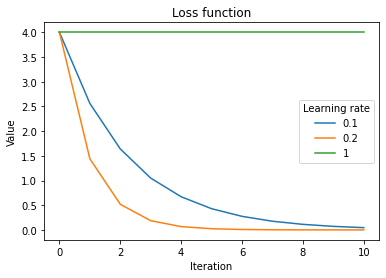

In [13]:
plot_GD(func = sqr, 
        start = 2, 
        lr = [0.1,0.2,1], 
        iter = 10)

Dùng thuật toán logistic regression phân loại hồ sơ cho vay hay không với dữ liệu ở đây (https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv), input là lương, thời gian làm việc, output là cho vay hay không.\
1. xây dựng model, tìm tham số.
2. dự đoán với các hồ sơ sau: (lương 2, thời gian: 3), (lương: 1, thời gian: 8), (lương: 5, thời gian: 5).

In [41]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [34]:
data = pd.read_csv("dataset.csv")

In [35]:
data.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [36]:
data=data.values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, d-1].reshape(-1, 1)

In [37]:
# Vẽ data bằng scatter
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

Text(0, 0.5, 'thời gian làm việc (năm)')

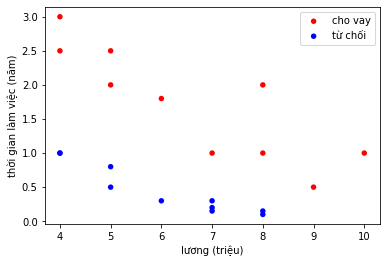

In [38]:
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('lương (triệu)')
plt.ylabel('thời gian làm việc (năm)')

In [39]:
# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,0.1,0.1]).reshape(-1,1)

In [43]:
# Số lần lặp bước 2
numOfIteration = 1000
learning_rate = 0.01
loss_history = []

for i in range(1, numOfIteration):
    
	 # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    loss = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    # np.dot: nhan ma tran, * / multiply : element-wise
    w = w - learning_rate * np.dot(x.T, y_predict-y)	 
    # print(loss)
    loss_history.append(loss)

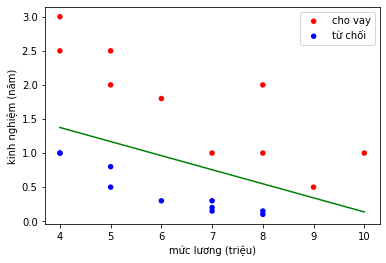

In [54]:
# Vẽ đường phân cách.
t = 0.5
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

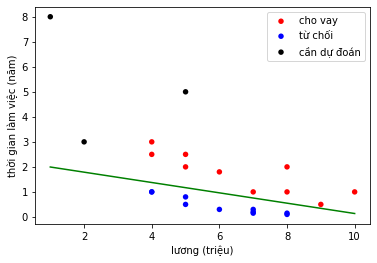

In [56]:
# Vẽ đường phân cách.
t = 0.5
# (lương 2, thời gian: 3), (lương: 1, thời gian: 8), (lương: 5, thời gian: 5).
check_luong = [2,1,5]
check_time = [3,8,5]
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.scatter(check_luong, check_time, c='black', edgecolors='none', s=30, label='cần dự đoán')
plt.legend(loc=1)
plt.xlabel('lương (triệu)')
plt.ylabel('thời gian làm việc (năm)')
plt.plot((1, 10),(-(w[0]+1*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()